In [1]:
pip install -q kaggle

In [2]:
from google.colab import files

In [3]:
files.upload()

Saving kaggle.json to kaggle.json


{'kaggle.json': b'{"username":"sadivamadaan","key":"98e973d88763e3cb86aad454f89534ea"}'}

In [4]:
 ! mkdir ~/.kaggle

In [5]:
! cp kaggle.json ~/.kaggle/

In [6]:
! chmod 600 ~/.kaggle/kaggle.json

In [7]:
! kaggle datasets list

ref                                                         title                                              size  lastUpdated          downloadCount  
----------------------------------------------------------  ------------------------------------------------  -----  -------------------  -------------  
gpreda/reddit-vaccine-myths                                 Reddit Vaccine Myths                              237KB  2021-11-21 16:54:23          16359  
crowww/a-large-scale-fish-dataset                           A Large Scale Fish Dataset                          3GB  2021-04-28 17:03:01           9882  
imsparsh/musicnet-dataset                                   MusicNet Dataset                                   22GB  2021-02-18 14:12:19           4550  
dhruvildave/wikibooks-dataset                               Wikibooks Dataset                                   2GB  2021-10-22 10:48:21           3615  
promptcloud/careerbuilder-job-listing-2020                  Careerbuilder Jo

In [9]:
! kaggle datasets download -d phylake1337/fire-dataset

 96% 372M/387M [00:03<00:00, 135MB/s]
100% 387M/387M [00:03<00:00, 107MB/s]


In [10]:
! mkdir test_images

In [11]:
! unzip fire-dataset.zip -d test_images

Archive:  fire-dataset.zip
  inflating: test_images/fire_dataset/fire_images/fire.1.png  
  inflating: test_images/fire_dataset/fire_images/fire.10.png  
  inflating: test_images/fire_dataset/fire_images/fire.100.png  
  inflating: test_images/fire_dataset/fire_images/fire.101.png  
  inflating: test_images/fire_dataset/fire_images/fire.102.png  
  inflating: test_images/fire_dataset/fire_images/fire.103.png  
  inflating: test_images/fire_dataset/fire_images/fire.104.png  
  inflating: test_images/fire_dataset/fire_images/fire.105.png  
  inflating: test_images/fire_dataset/fire_images/fire.106.png  
  inflating: test_images/fire_dataset/fire_images/fire.107.png  
  inflating: test_images/fire_dataset/fire_images/fire.108.png  
  inflating: test_images/fire_dataset/fire_images/fire.109.png  
  inflating: test_images/fire_dataset/fire_images/fire.11.png  
  inflating: test_images/fire_dataset/fire_images/fire.110.png  
  inflating: test_images/fire_dataset/fire_images/fire.111.png  
  

In [12]:
! pip install fastai --upgrade

     |████████████████████████████████| 189 kB 5.5 MB/s 
     |████████████████████████████████| 56 kB 4.3 MB/s 
  Attempting uninstall: fastai
    Found existing installation: fastai 1.0.61
    Uninstalling fastai-1.0.61:
      Successfully uninstalled fastai-1.0.61


In [13]:
import fastai
from fastai.vision.all import *
from pathlib import Path

In [14]:
path = Path.cwd()/"test_images/fire_dataset"

In [15]:
path.ls()

(#2) [Path('/content/test_images/fire_dataset/non_fire_images'),Path('/content/test_images/fire_dataset/fire_images')]

In [17]:
fires = DataBlock(blocks = (ImageBlock, CategoryBlock),
                  get_items = get_image_files,
                  get_y = parent_label,
                  item_tfms = Resize(440),
                  batch_tfms = [*aug_transforms(size = (220), min_scale=0.8), Normalize.from_stats(*imagenet_stats)])

In [18]:
dls = fires.dataloaders(path, device = "cuda")

/usr/local/lib/python3.7/dist-packages/torch/_tensor.py:1051: UserWarning: torch.solve is deprecated in favor of torch.linalg.solveand will be removed in a future PyTorch release.
torch.linalg.solve has its arguments reversed and does not return the LU factorization.
To get the LU factorization see torch.lu, which can be used with torch.lu_solve or torch.lu_unpack.
X = torch.solve(B, A).solution
should be replaced with
X = torch.linalg.solve(A, B) (Triggered internally at  ../aten/src/ATen/native/BatchLinearAlgebra.cpp:766.)
  ret = func(*args, **kwargs)


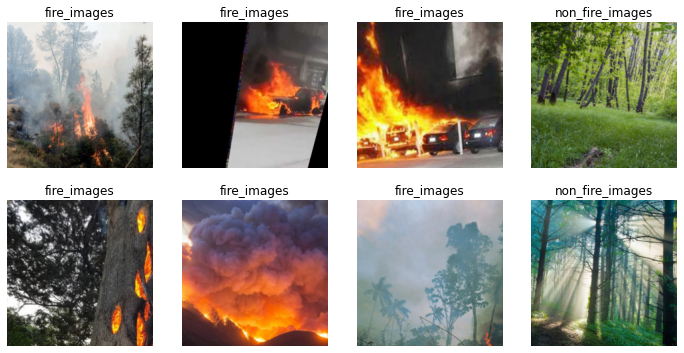

In [19]:
dls.show_batch(max_n = 8)

In [29]:
learn = cnn_learner(dls, resnet34, metrics = error_rate)

SuggestedLRs(steep=0.0010000000474974513, valley=0.0008317637839354575, minimum=0.012022644281387329)

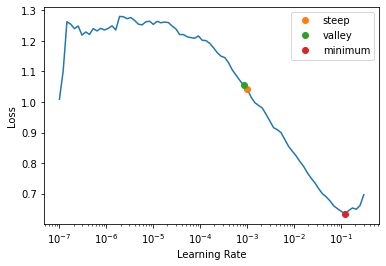

In [21]:
learn.lr_find(suggest_funcs=(steep, valley, minimum))

In [30]:
learn.fit_one_cycle(n_epoch = 7, lr_max = 1e-2)

epoch,train_loss,valid_loss,error_rate,time
0,0.638825,0.330097,0.030151,00:40
1,0.381926,0.161192,0.025126,00:41
2,0.298601,0.127625,0.040201,00:41
3,0.216590,0.193631,0.035176,00:41
4,0.164065,0.152539,0.030151,00:41
5,0.124739,0.149659,0.025126,00:40
6,0.098923,0.141779,0.020101,00:40


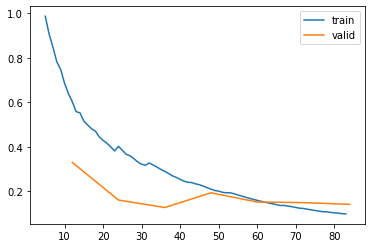

In [31]:
learn.recorder.plot_loss()

In [24]:
#learn.unfreeze()

SuggestedLRs(steep=7.585775847473997e-07, valley=3.630780702224001e-05, minimum=2.7542287716642023e-05)

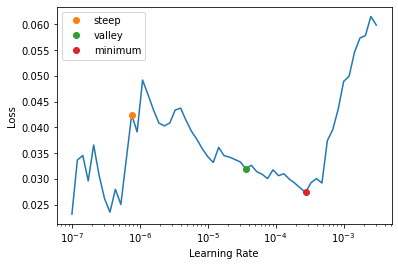

In [26]:
#learn.lr_find(suggest_funcs=(steep, valley, minimum))

In [27]:
#learn.fit_one_cycle(n_epoch=3, lr_max = 1e-4)

epoch,train_loss,valid_loss,error_rate,time
0,0.037059,0.230090,0.035176,00:42
1,0.048522,0.134115,0.020101,00:42
2,0.038466,0.121877,0.025126,00:43


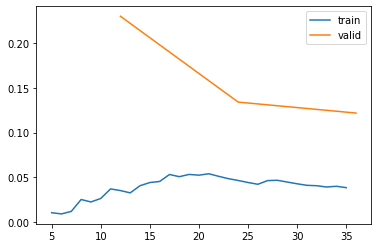

In [28]:
#learn.recorder.plot_loss()

In [32]:
pred = learn.predict("/content/download (2).jfif")

In [34]:
img = Image.open("/content/download (2).jfif")

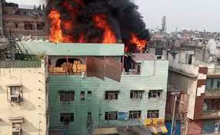

In [36]:
img.to_thumb(220,220)

In [37]:
img = Image.open("/content/download (3).jfif")

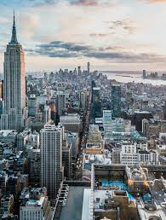

In [38]:
img.to_thumb(220, 220)

In [40]:
pred = learn.predict("/content/download (3).jfif")

In [41]:
pred

('fire_images', TensorBase(0), TensorBase([0.9818, 0.0182]))

In [42]:
img = Image.open("/content/download (4).jfif")

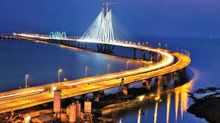

In [43]:
img.to_thumb(220,220)

In [46]:
pred = learn.predict("/content/download (5).jfif")

In [47]:
pred

('fire_images', TensorBase(0), TensorBase([0.8864, 0.1136]))

In [49]:
interp = ClassificationInterpretation.from_learner(learn)

interp.confusion_matrix()

array([[143,   0],
       [  4,  52]])

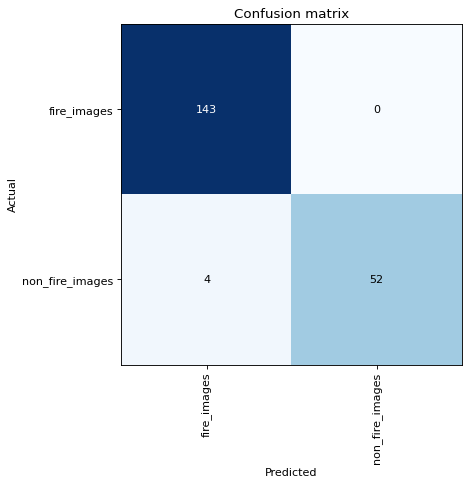

In [50]:
interp.plot_confusion_matrix(figsize = (6,6), dpi = 80)